Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Feb2019**

# 03c. Nuclear Reactor Point Dynamics: Reactivity Feedback
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Steady state](#ss)
* [Vector ODE System](#vodes)
* [Function library](#flib)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Step with Negative Feedback Results](#res1)
* [Interactive Results](#ires)
---

## [Objectives](#toc)<a id="obj"></a>
+ Use one-group energy, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity.
+ Explore and understand intrinsic feedback.

## [Introduction](#toc)<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBVLgYLkr32CyVyPpC77PtnA?e=u5ngLM).

Refer to Notebook 03a.


## [Problem Statement](#toc)<a id="ps"></a>

Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.


## [Input Data](#toc)<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |  -               | 
reactivity feedback coef.   | $\alpha_n$         | $-10^{-2}$           |  cm$^3$          |


For thermal fission of $^{235}$U the following six-group delayed neutron precursors data is typically used (*Physics of Nuclear Kinetics*, G. R. Keepin, 1965, Addison-Wesley Pub. Co.):


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

In [1]:
'''Parameters'''

params = dict()

params['gen_time']          = 1.0e-4  # s
params['beta']              = 6.5e-3  # 
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 
params['alpha_n']           = -1e-2 # cm^3

## [One-Group Energy  Neutron Balance](#toc)<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho(t)-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i  + q(t),
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not accounting for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

An example of a generic reactivity feedback model is as

\begin{equation*}
 \rho(t) = \rho_0 + \alpha_n\,\bigl(n(t) - n(0)\bigr),
\end{equation*}

where $\alpha_n \le 0$ is the feedback coefficient and the initially applied reactivity is $\rho_0$.

## [Steady State](#toc)<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [2]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    # setup the steady state for the delayed-neutron precursors
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss'] # dictionary value must be set later
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    params['rho_0']   = params['reactivity'] # dictionary value must be set later
    
    return

## [Vector ODE System](#toc)<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho(t)-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7 .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0}
\end{align*}


where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

## [Function Library](#toc) <a id="flib"></a>

Functions used later in the notebook.

In [3]:
'''Reactivity function'''

def rho_func( t, n_dens, params ):
    '''
    Reactivity function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    n_dens: float, required
        Neutron density at time t.
    params: dict, required
        Dictionary of quantities. It must have a `'rho_0'` key/value pair.
    
    Returns
    -------
    rho_t: float
        Value of reactivity.

    Examples
    --------
    '''
    
    rho_0    = params['rho_0']
    alpha_n  = params['alpha_n']
    n_dens_0 = params['n_0']
    
    rho_t = rho_0 + alpha_n * (n_dens - n_dens_0)
        
    return rho_t

In [4]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0.0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

In [5]:
'''ODE function'''

def f_vec( time, u_vec, params ):  
    
    import numpy as np
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0]
    
    gen_time = params['gen_time'] 
    beta     = params['beta']
    
    species_decay = params['species_decay']
    lambda_vec    = np.array(species_decay)
    
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    rho_t = rho_func(time, n_dens, params)
    
    q_source_t = q_source(time, params)
         
    c_vec = u_vec[1:]
    
    n_species = len(lambda_vec)
    f_tmp = np.zeros(n_species+1,dtype=np.float64) # vector for f_vec return
    
    # neutron balance
    f_tmp[0] = (rho_t - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    
    # loop over 6 species balance
    f_tmp[1:] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    
    return f_tmp

In [6]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
       
    # m-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(n_species+1,dtype=np.float64)
    
    u_vec_0[0]  = n_0
    u_vec_0[1:] = c_vec_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-4, mxstep=max_n_steps_per_time_step,
                                         full_output=True, tfirst=True )

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [7]:
'''Plotting function definition'''

def plot_results( u_vec_history, semi_log=False, markers=False, precursors=True ):
    
    time_stamps = params['time_stamps']
        
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(14, 6))

    if precursors == True:
        
        ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
        color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
    
        for (j,color_id) in zip(range(u_vec_history[:,1:].shape[1]), color_ids):
            color=plt.cm.nipy_spectral(color_id)
        
            ax2.plot(time_stamps, u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
        
        ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax2.legend(loc='lower right',fontsize=12)
        if semi_log == True:
            ax2.set_yscale('log') # uncomment to plot y in log scale
        #ax2.grid(True)

    if markers == True:
        ax1.plot(time_stamps, u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
    else:
        ax1.plot(time_stamps, u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )

    ax1.set_xlabel(r'Time [s]',fontsize=16)
    ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [8]:
'''Utility function to peak at results table'''

def peek(time, data, head=5, tail=5):  

    import pandas as pd
    
    layout = {'time':time[:head]}
    layout['n'] = data[:head,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[:head,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')
    
    layout = {'time':time[-tail:]}
    layout['n'] = data[-tail:,j]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[-tail:,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')

## [Reactivity Step with Negative Feedback](#toc)<a id="res1"></a>

Critical steady state with a step change in reactivity.

In [9]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.10 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['alpha_n'] = -1e-2 # cm^3

# setup remaining initial conditions
setup_initial_conditions(params)

In [10]:
'''Evolve the point-reactor'''

time_final    = 200 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

In [11]:
peek(params['time_stamps'],u_vec_history)

    time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.504  87.189  235.242  57.850  42.993  3.305  0.457
1  1.005  0.538  87.257  235.686  58.232  43.698  3.448  0.485
2  2.010  0.541  87.331  236.169  58.619  44.300  3.509  0.489
3  3.015  0.543  87.410  236.671  58.994  44.798  3.539  0.492
4  4.020  0.544  87.492  237.186  59.353  45.209  3.557  0.493

      time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  195.980  0.516  97.080  265.050  65.248  48.495  3.728  0.516
1  196.985  0.516  97.096  265.060  65.249  48.496  3.728  0.516
2  197.990  0.516  97.111  265.069  65.250  48.497  3.728  0.516
3  198.995  0.516  97.127  265.079  65.251  48.497  3.728  0.516
4  200.000  0.516  97.142  265.088  65.252  48.498  3.728  0.516



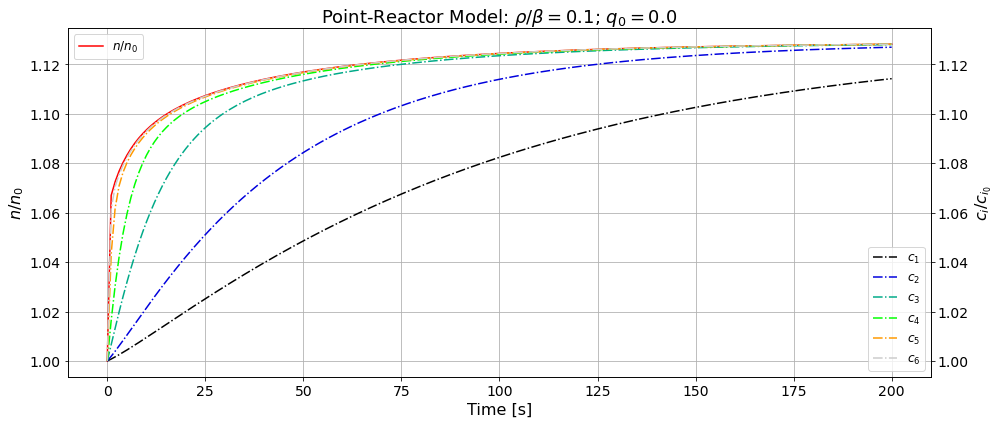

In [12]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

## [Interactive Results](#toc) <a id="ires"></a>
Here we can change the parameters interactively and compute the dynamics automatically.

In [ ]:
'''Create interactive plot'''
#from plotly import __version__
#print( __version__) # requires version >= 3.4.0

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools


fig = go.FigureWidget()
fig = tools.make_subplots(rows=2, cols=1, print_grid=False)

layout = go.Layout(title='Point-Reactor Model', 
         xaxis={'title':'Time [s]'}, 
         yaxis=dict(side='left',title='$n/n_0$',anchor='x'),
         xaxis2={'title':'Time [s]'}, 
         yaxis2=dict(side='left',title='$c_i/c_{i_0}',anchor='x2'),
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Vary number of modes'''

from ipywidgets import interact
import ipywidgets as widgets
@interact(time_final=widgets.FloatSlider(description=r'$t_{max}\,[\text{s}]$',value=50,min=1,max=500,step=10,readout_format='3.0f'),
          rho_over_beta=widgets.FloatSlider(description=r'$\rho/\beta=$',value=0.01,min=-0.1,max=0.6,step=0.01,readout_format='5.3f'), 
          gen_time=widgets.FloatSlider(description=r'$\ell\,[\text{s}]=$',value=1e-4,min=1e-8,max=1e-3,step=1e-5,readout_format='5.3e'),
          alpha_n=widgets.FloatSlider(description=r'$\alpha_n\,[\text{cm}^3]=$',value=-1,min=-1e+1,max=0.1,step=0.05,readout_format='5.3e'),
          select=widgets.Dropdown(description='select:',value='Neutron Dens.',options=['Neutron Dens.', 'Delayed-Neutron Precur.','All']) 
         )
def update(time_final, rho_over_beta, gen_time, alpha_n, select):
    with fig.batch_update():
       
        n_time_stamps = params['n_time_stamps']
        params['time_final'] = time_final
        
        time_stamps = np.linspace(0.0, time_final, num=n_time_stamps)
        params['time_stamps'] = time_stamps
        
        beta = params['beta']
        params['reactivity'] = rho_over_beta * beta
        
        params['gen_time']   = gen_time
        
        params['alpha_n']   = alpha_n/100.0
        
        setup_initial_conditions(params)
        
        history = run_point_reactor( f_vec, params )
        
        def plotly_neutron(fig,row=1):
            scatt = fig.add_scatter(name='$n/n_0$',mode='lines')
            scatt.x = time_stamps
            scatt.y = history[:,0]/params['n_0']
            scatt.xaxis='x'
            scatt.yaxis='y'
            scatt.line.color='red'
            fig.append_trace(scatt, row, 1) 
            fig['layout']['xaxis'].update(title='Time [s]', showgrid=True)
            fig['layout']['yaxis'].update(title='$n/n_0$', showgrid=True)
            fig['layout'].update(title='Point-Reactor Model Neutron Density')  
            return
        
        def plotly_precursors(fig,row=1):
            
            if row == 1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row == 2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            else:
                assert False
            
            import matplotlib.pyplot as plt
            color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
            
            for (j,color_id) in zip( range(history[:,1:].shape[1]), color_ids ):
                color = plt.cm.nipy_spectral(color_id)
                red_channel   = str(int(color[0]*255))
                green_channel = str(int(color[1]*255))
                blue_channel  = str(int(color[2]*255))
                color ='rgb('+red_channel+','+green_channel+','+blue_channel+')'
                label ='$c_%i/c_{%i_0}$'%(j+1,j+1)
                scatt = fig.add_scatter(name=label,mode='lines')
                scatt.line.color = color
                scatt.x = time_stamps
                scatt.y = history[:,j+1]/params['c_vec_0'][j]
                
                if row==1:
                    scatt.xaxis='x'
                    scatt.yaxis='y'
                elif row==2:
                    scatt.xaxis='x2'
                    scatt.yaxis='y2'
                else:
                    assert False, 'not available.'
                    
                fig.append_trace(scatt, row, 1)
                fig['layout'].update(title='Delayed-Neutron Precursors')
                fig['layout'][xaxis].update(title='Time [s]', showgrid=True)
                fig['layout'][yaxis].update(title=r'$c_i/c_{i_0}$', showgrid=True)
                fig['layout'].update(title='Point-Reactor Model Delayed-Neutron Precursors')
            return
               
        if select == 'Neutron Dens.':
            fig.data = [] # clear the data stack          
            plotly_neutron(fig,row=1)
            
        elif select == 'Delayed-Neutron Precur.':
            fig.data = [] # clear the data stack
            plotly_precursors(fig,row=1)

        elif select == 'All':
            fig.data = [] # clear the data stack
            plotly_neutron(fig,row=1)
            plotly_precursors(fig,row=2)
  
        else:
            assert False, 'no other option; bail out'
            
    fig['layout'].update(height=900, width=950) 
    
    plotly.offline.iplot(fig)
    
    return

#plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')